taken from tutoral at https://arielycliu.medium.com/classifying-food-with-computer-vision-a473249cf2f2#eb38 


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


2024-02-26 00:19:40.462980: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-26 00:19:40.465451: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-26 00:19:40.496210: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 00:19:40.496242: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 00:19:40.497192: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

#### Constants

In [2]:
image_size = (256, 256)
input_shape = (256, 256, 3)
val_split = 0.2
img_path = "pictures/kaggleset/"

In [3]:
#DATAGEN -- downsize, get train/test 
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_gen = data_gen.flow_from_directory(img_path + 'train', target_size=image_size)
test_gen = data_gen.flow_from_directory(img_path + 'test', target_size=image_size)
print(train_gen.class_indices)

Found 3115 images belonging to 36 classes.
Found 359 images belonging to 36 classes.
{'apple': 0, 'banana': 1, 'beetroot': 2, 'bell pepper': 3, 'cabbage': 4, 'capsicum': 5, 'carrot': 6, 'cauliflower': 7, 'chilli pepper': 8, 'corn': 9, 'cucumber': 10, 'eggplant': 11, 'garlic': 12, 'ginger': 13, 'grapes': 14, 'jalepeno': 15, 'kiwi': 16, 'lemon': 17, 'lettuce': 18, 'mango': 19, 'onion': 20, 'orange': 21, 'paprika': 22, 'pear': 23, 'peas': 24, 'pineapple': 25, 'pomegranate': 26, 'potato': 27, 'raddish': 28, 'soy beans': 29, 'spinach': 30, 'sweetcorn': 31, 'sweetpotato': 32, 'tomato': 33, 'turnip': 34, 'watermelon': 35}


#### InceptionV3


In [4]:
from tensorflow.keras.applications import InceptionV3
model = InceptionV3(weights="imagenet", input_shape=input_shape, include_top=False)
model.trainable = False

In [5]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPool2D, GlobalAveragePooling2D
old_model = model
model = Sequential()
model.add(old_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(36, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 36)                2340      
                                                                 
Total params: 21936260 (83.68 MB)
Trainable params: 133476 (521.39 KB)
Non-trainable params: 21802784 (83.17 MB)
_________

In [6]:
#training
from tensorflow.keras.optimizers import Adam
model.compile(optimizer="adam",
               loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(min_delta=0.001, patience=5, restore_best_weights=True)
cp = ModelCheckpoint(filepath='temp_model.hdf5', verbose=1, save_best_only=True, save_weights_only=True)


In [8]:
import scipy
history = model.fit(train_gen,
                    validation_data = test_gen,
                    epochs=30,
                    verbose=1,
                    callbacks=[es, cp])

Epoch 1/30
 2/98 [..............................] - ETA: 2:33 - loss: 3.8241 - accuracy: 0.1094

/home/ananthk/capstone/SCRAPS-ML/venv/lib/python3.10/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 [==============================] - ETA: 0s - loss: 2.4301 - accuracy: 0.3493
Epoch 1: val_loss improved from inf to 1.02176, saving model to temp_model.hdf5
98/98 [==============================] - 191s 2s/step - loss: 2.4301 - accuracy: 0.3493 - val_loss: 1.0218 - val_accuracy: 0.7632
Epoch 2/30
98/98 [==============================] - ETA: 0s - loss: 1.3305 - accuracy: 0.6128
Epoch 2: val_loss improved from 1.02176 to 0.64091, saving model to temp_model.hdf5
98/98 [==============================] - 194s 2s/step - loss: 1.3305 - accuracy: 0.6128 - val_loss: 0.6409 - val_accuracy: 0.8412
Epoch 3/30
98/98 [==============================] - ETA: 0s - loss: 1.0444 - accuracy: 0.6831
Epoch 3: val_loss improved from 0.64091 to 0.50616, saving model to temp_model.hdf5
98/98 [==============================] - 181s 2s/step - loss: 1.0444 - accuracy: 0.6831 - val_loss: 0.5062 - val_accuracy: 0.8747
Epoch 4/30
98/98 [==============================] - ETA: 0s - loss: 0.8782 - accuracy: 0.71

<Axes: >

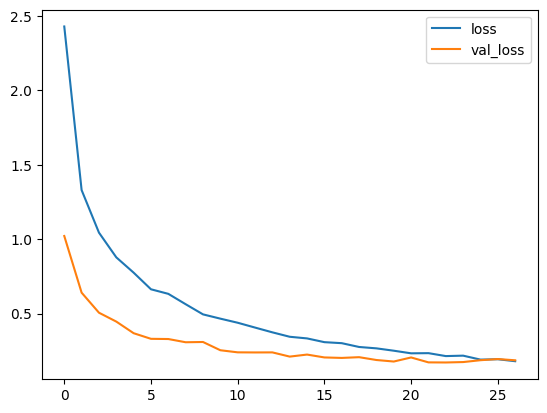

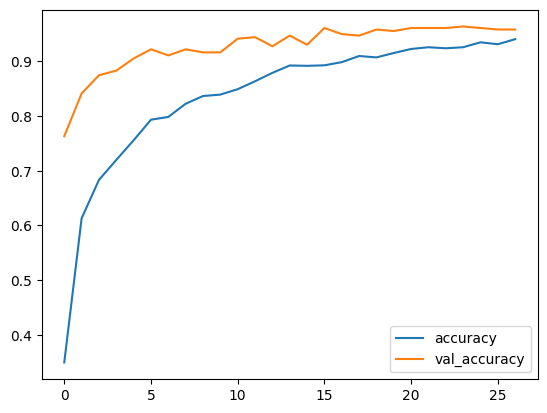

In [9]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()